## The Exercise

You will build a few neural networks during this exercise, for all the networks you build you should:

* Build a network for classification using the built in MNIST dataset.
* Use the sigmoid activation function.
* Use the categorical cross entropy loss function.
* Use stochastic gradient descent as the optimizer.
* Train for at least 10 epochs.
* Plot a chart with your network's performance on training and validation data during training.

### Part One:

Use Tensorflow to build a network with a single hidden layer and at least 300,000 trainable parameters. Answer the following questions about this model:

* How many total trainable parameters does this model have?
  * How many weights?
  * How many biases?
* How accurate was this model on the validation data after 10 epochs?
  * How different was the model's performance on the training data?
  * How different was the model's performance on the test data?
* About how long did each epoch take?

Use Tensorflow to build a network with a single hidden layer at fewer than 50,000 trainable parameters, then answer the same questions.

In [1]:
# Imports and formatting the data
# See previous Notebooks if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Define the number of classes to create 1-hot encoded vectors using to_categorical
num_classes = 10 
# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images.shape[0] is the list length, hence 60,000.
# training_images.shape[1] is the image shape, hence (28, 28).
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

###### Build a network with a single hidden layer and at least 300,000 trainable parameters.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 5ms/step - loss: 1.1938 - accuracy: 0.6634 - val_loss: 0.4015 - val_accuracy: 0.9047
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4289 - accuracy: 0.8930 - val_loss: 0.3025 - val_accuracy: 0.9243
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3392 - accuracy: 0.9094 - val_loss: 0.2618 - val_accuracy: 0.9313
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2986 - acc

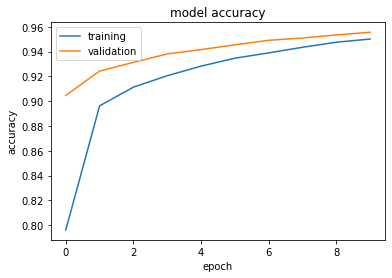

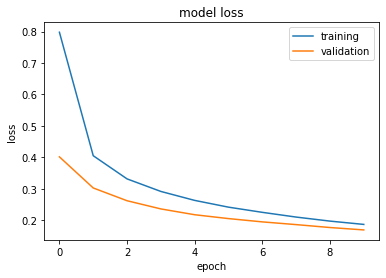

Test loss: 0.201
Test accuracy: 0.942


In [2]:
single_layer_model = Sequential()

# Here I've chosen a hidden layer with 400 nodes to have more than 300,000 parameters. 
single_layer_model.add(Dense(units=400, activation='sigmoid', input_shape=(image_size,)))
single_layer_model.add(Dense(units=num_classes, activation='softmax'))
single_layer_model.summary()

single_layer_model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = single_layer_model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)
plot_training_history(history, single_layer_model)

Answer the following questions about this model:

* How many total trainable parameters does this model have? This model has 314000 trainable parameters. 
  * How many weights? The number of weights of the hidden layer is equal to the number of inputs, that is 784. 
  * How many biases? Each node in the hidden layer has a bias, so there are 400 biases. 
* How accurate was this model on the validation data after 10 epochs? The accuracy on the validation data was 0.9557 after 10 epochs. 
  * How different was the model's performance on the training data? The accuracy on the training data was 0.9509. 
  * How different was the model's performance on the test data? The accuracy on the test data was 0.942. 
* About how long did each epoch take? Each epoch took 2 seconds. 